In [8]:
import warnings
import numpy as np
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    auc, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [13]:
import pandas as pd

# Load the dataset to analyze
file_path = r"C:\Users\osmaa\OneDrive\Masaüstü\data_son_featured.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows to understand its structure
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,is_promoted,age_group_26-30,age_group_31-35,age_group_36-40,age_group_41-50,age_group_51+,service_group_1-2 yıl,service_group_10-15 yıl,service_group_15+ yıl,service_group_2-3 yıl,service_group_3-5 yıl,service_group_5-10 yıl,training_score_group_Successful,training_score_group_Very Successful
0,Sales & Marketing,Master's & above,f,sourcing,1,5.0,1,0,False,True,False,False,False,False,False,False,False,False,True,False,False
1,Operations,Bachelor's,m,other,1,5.0,0,0,True,False,False,False,False,False,False,False,False,True,False,False,False
2,Sales & Marketing,Bachelor's,m,sourcing,1,3.0,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False
3,Sales & Marketing,Bachelor's,m,other,2,1.0,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False
4,Technology,Bachelor's,m,other,1,3.0,0,0,False,False,False,True,False,True,False,False,False,False,False,True,False


In [14]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())


In [15]:
check_df(data)

##################### Shape #####################
(54808, 21)
##################### Types #####################
department                               object
education                                object
gender                                   object
recruitment_channel                      object
no_of_trainings                           int64
previous_year_rating                    float64
KPIs_met >80%                             int64
is_promoted                               int64
age_group_26-30                            bool
age_group_31-35                            bool
age_group_36-40                            bool
age_group_41-50                            bool
age_group_51+                              bool
service_group_1-2 yıl                      bool
service_group_10-15 yıl                    bool
service_group_15+ yıl                      bool
service_group_2-3 yıl                      bool
service_group_3-5 yıl                      bool
service_group_5-10 yıl  

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Age için gruplama fonksiyonu
# def age_group_custom(age):
#     if age <= 25:
#         return "20-25"
#     elif age <= 30:
#         return "26-30"
#     elif age <= 35:
#         return "31-35"
#     elif age <= 40:
#         return "36-40"
#     elif age <= 50:
#         return "41-50"
#     else:
#         return "51+"

# # Length of Service (Kıdem) için gruplama fonksiyonu
# def service_group_custom(service):
#     if service == 1:
#         return "1 yıl"
#     elif service <= 2:
#         return "1-2 yıl"
#     elif service <= 3:
#         return "2-3 yıl"
#     elif service <= 5:
#         return "3-5 yıl"
#     elif service <= 10:
#         return "5-10 yıl"
#     elif service <= 15:
#         return "10-15 yıl"
#     else:
#         return "15+ yıl"

# # Grupları oluşturma
# data["age_group"] = data["age"].apply(age_group_custom)
# data["service_group"] = data["length_of_service"].apply(service_group_custom)

# # One-hot encoding uygulama
# data = pd.get_dummies(data, columns=["age_group", "service_group"], drop_first=True)

# # İlk birkaç satırı görüntüleme
# data.head()


In [ ]:
# # Function to group avg_training_score
# def training_score_group(score):
#     if score <= 60:
#         return "Failing"
#     elif score <= 79:
#         return "Successful"
#     else:
#         return "Very Successful"

# # Apply the function to create a new column
# data["training_score_group"] = data["avg_training_score"].apply(training_score_group)

# # One-hot encode the new column
# data = pd.get_dummies(data, columns=["training_score_group"], drop_first=True)

# # Display the first few rows of the updated dataset
# data.head()


In [ ]:
# data.drop(columns=["age", "length_of_service", "avg_training_score"],inplace=True)

In [ ]:
# data.describe().T

In [ ]:
# data.isnull().sum()

In [ ]:
# data.to_excel("data_son_featured.xlsx", index=False)

In [19]:
data_info = data.info()
missing_values = data.isnull().sum()
descriptive_stats = data.describe()

# Display the results to understand the data better
data_info, missing_values, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   department                            54808 non-null  object 
 1   education                             52399 non-null  object 
 2   gender                                54808 non-null  object 
 3   recruitment_channel                   54808 non-null  object 
 4   no_of_trainings                       54808 non-null  int64  
 5   previous_year_rating                  50684 non-null  float64
 6   KPIs_met >80%                         54808 non-null  int64  
 7   is_promoted                           54808 non-null  int64  
 8   age_group_26-30                       54808 non-null  bool   
 9   age_group_31-35                       54808 non-null  bool   
 10  age_group_36-40                       54808 non-null  bool   
 11  age_group_41-50

(None,
 department                                 0
 education                               2409
 gender                                     0
 recruitment_channel                        0
 no_of_trainings                            0
 previous_year_rating                    4124
 KPIs_met >80%                              0
 is_promoted                                0
 age_group_26-30                            0
 age_group_31-35                            0
 age_group_36-40                            0
 age_group_41-50                            0
 age_group_51+                              0
 service_group_1-2 yıl                      0
 service_group_10-15 yıl                    0
 service_group_15+ yıl                      0
 service_group_2-3 yıl                      0
 service_group_3-5 yıl                      0
 service_group_5-10 yıl                     0
 training_score_group_Successful            0
 training_score_group_Very Successful       0
 dtype: int64,
        no_o

In [20]:
# 2. Eksik Veri Doldurma
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True)

In [21]:
# 3. Kategorik Değişkenleri Kodlama
categorical_columns = ['department', 'education', 'gender', 'recruitment_channel']
categorical_dummy_columns = [col for col in data.columns if col.endswith('group') or col.endswith('Successful')]
all_categorical_columns = categorical_columns + categorical_dummy_columns
data_encoded = pd.get_dummies(data, columns=all_categorical_columns, drop_first=True)

In [22]:


# 4. Sayısal Değişkenleri Ölçeklendirme
numerical_columns = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [23]:
# 5. Veri Setini Ayırma
X = data_encoded.drop(columns=['is_promoted'])
y = data_encoded['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 6. SMOTE ile Dengesizlik Çözümü
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

  File "C:\Users\osmaa\anaconda3\envs\keras_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35097, number of negative: 35097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 70194, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


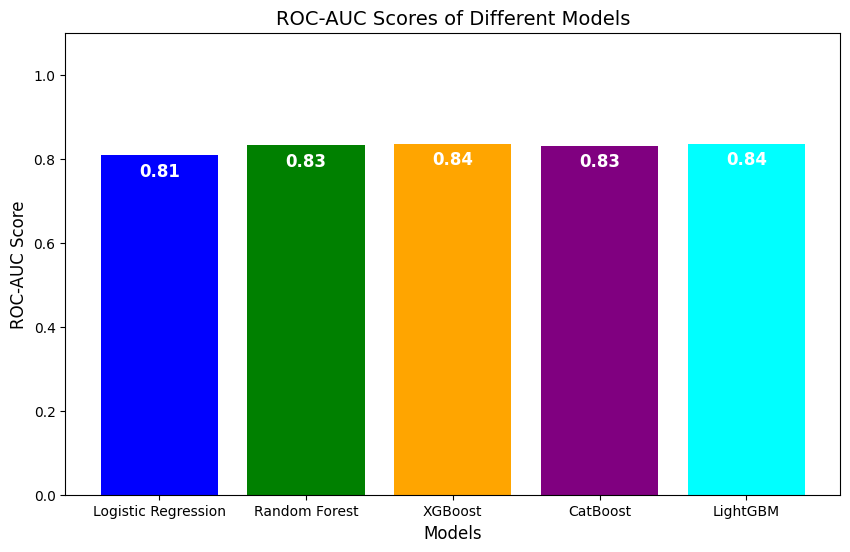

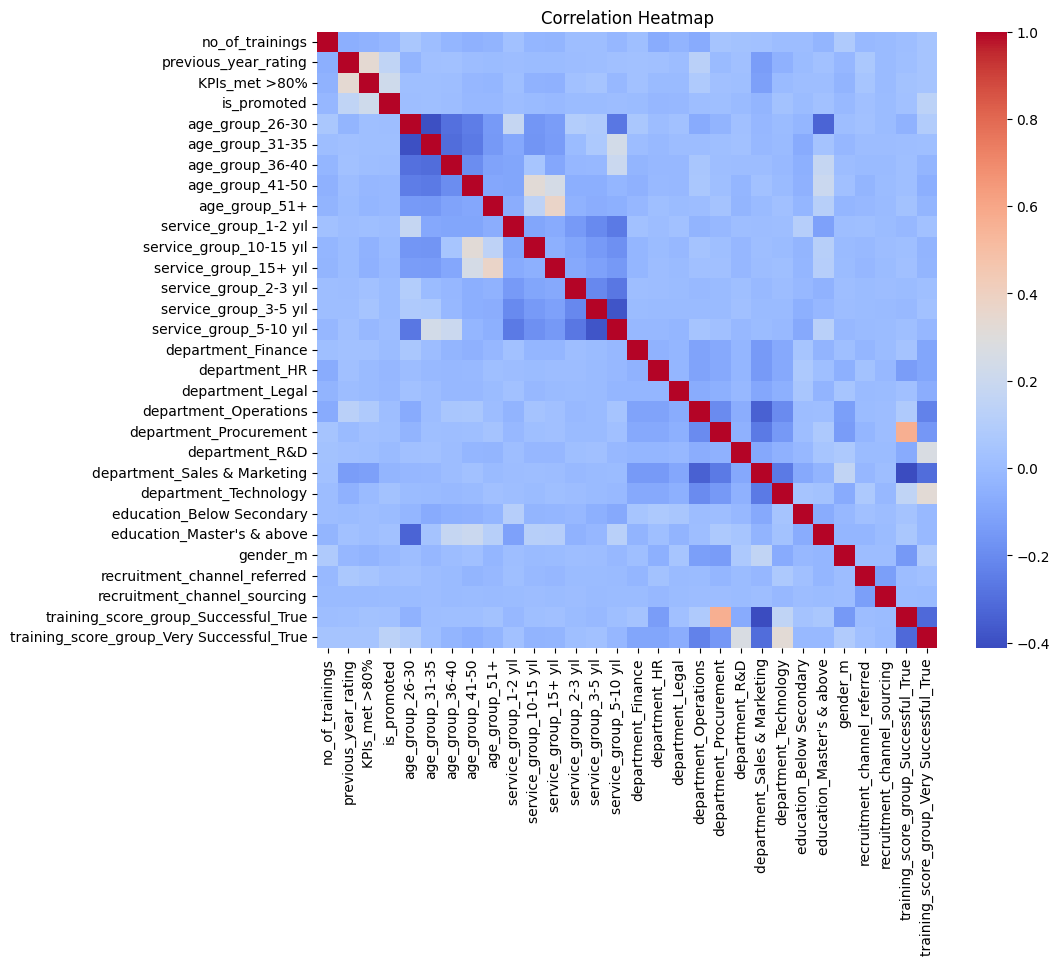

In [26]:
# 7. Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_smote, y_train_smote)
y_pred_log = logistic_model.predict(X_test)
y_pred_proba_log = logistic_model.predict_proba(X_test)[:, 1]
log_auc = roc_auc_score(y_test, y_pred_proba_log)

# 8. Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

# 9. XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# 10. CatBoost
cat_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=3, random_state=42, verbose=0, eval_metric='AUC')
cat_model.fit(X_train_smote, y_train_smote)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]
cat_auc = roc_auc_score(y_test, y_pred_proba_cat)

# 11. LightGBM
lgbm_model = LGBMClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train_smote, y_train_smote)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
lgbm_auc = roc_auc_score(y_test, y_pred_proba_lgbm)

# 12. ROC-AUC Skorlarını Görselleştirme
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM']
roc_auc_scores = [log_auc, rf_auc, xgb_auc, cat_auc, lgbm_auc]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, roc_auc_scores, color=['blue', 'green', 'orange', 'purple', 'cyan'])
plt.title('ROC-AUC Scores of Different Models', fontsize=14)
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1.1)

for bar, score in zip(bars, roc_auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.2f}', 
             ha='center', color='white', fontsize=12, weight='bold')

plt.show()

# 13. Korelasyon Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 14. Confusion Matrix for Logistic Regression
# cm = confusion_matrix(y_test, logistic_model.predict(X_test))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Promoted', 'Promoted'])
# disp.plot(cmap='Blues')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()

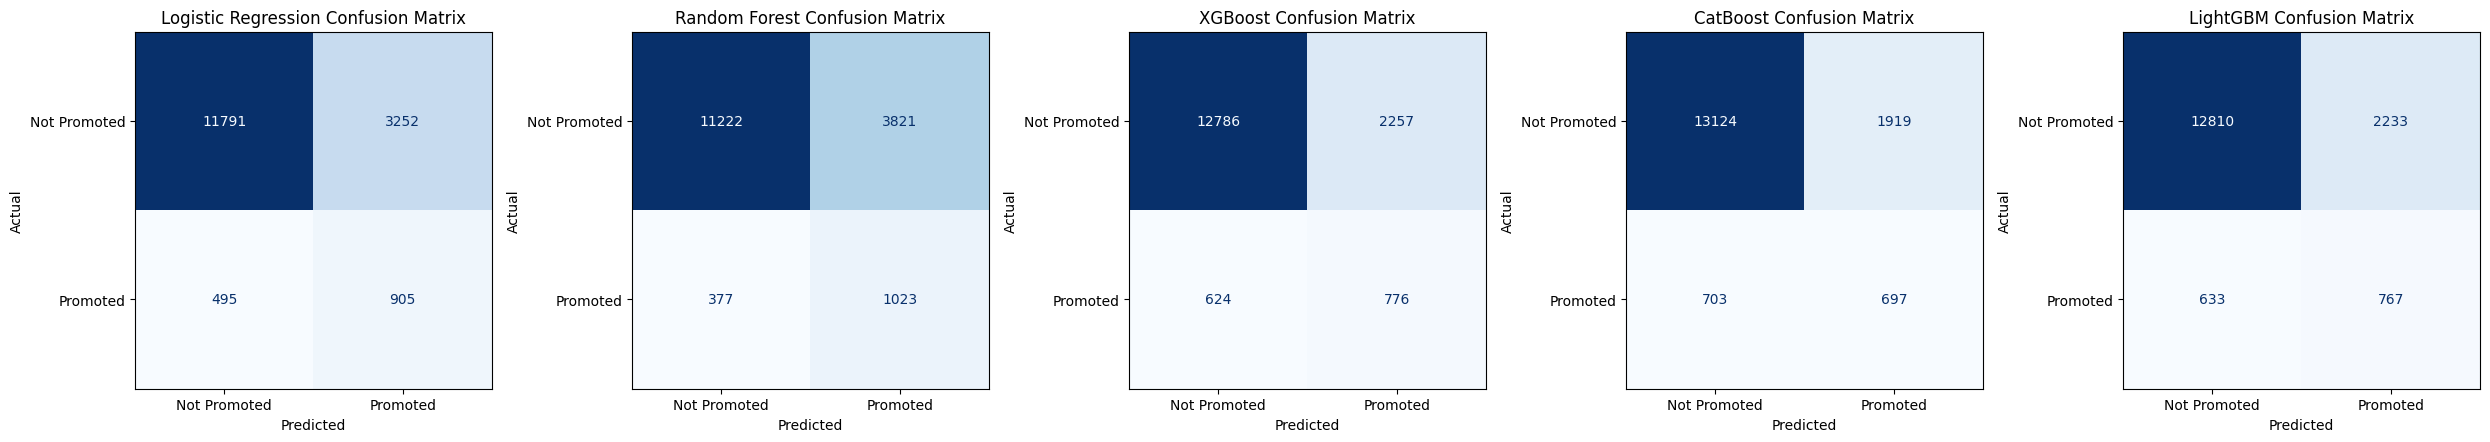

In [27]:
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'CatBoost': cat_model,
    'LightGBM': lgbm_model
}

# Grafik boyutunu ayarlayın
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Her bir model için confusion matrix çizelim
for idx, (model_name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Promoted', 'Promoted'])
    ax = axes[idx]
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Logistic Regression Hyperparameter Tuning
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

log_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), log_param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
log_grid_search.fit(X_train_smote, y_train_smote)
best_log_model = log_grid_search.best_estimator_

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_smote, y_train_smote)
best_rf_model = rf_grid_search.best_estimator_

# XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train_smote, y_train_smote)
best_xgb_model = xgb_grid_search.best_estimator_

# CatBoost Hyperparameter Tuning
cat_param_grid = {
    'iterations': [200, 500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

cat_grid_search = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0, eval_metric='AUC'), cat_param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
cat_grid_search.fit(X_train_smote, y_train_smote)
best_cat_model = cat_grid_search.best_estimator_

# LightGBM Hyperparameter Tuning
lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63]
}

lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), lgbm_param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
lgbm_grid_search.fit(X_train_smote, y_train_smote)
best_lgbm_model = lgbm_grid_search.best_estimator_

# Evaluate Best Models
models = {
    "Logistic Regression": best_log_model,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "CatBoost": best_cat_model,
    "LightGBM": best_lgbm_model
}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} ROC-AUC: {auc_score:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35097, number of negative: 35097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 70194, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Logistic Regression ROC-AUC: 0.81
Random Forest ROC-AUC: 0.82
XGBoost ROC-AUC: 0.81
CatBoost ROC-AUC: 0.81
Li

In [40]:
import joblib
joblib.dump(best_xgb_model, "xgb_model.pkl")


['xgb_model.pkl']

In [38]:
feature_names = X_train.columns.tolist()
import joblib
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']

In [32]:
!pip install streamlit

In [42]:
data.columns

Index(['department', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'is_promoted', 'age_group_26-30', 'age_group_31-35', 'age_group_36-40', 'age_group_41-50', 'age_group_51+', 'service_group_1-2 yıl', 'service_group_10-15 yıl', 'service_group_15+ yıl', 'service_group_2-3 yıl', 'service_group_3-5 yıl', 'service_group_5-10 yıl', 'training_score_group_Successful', 'training_score_group_Very Successful'], dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   department                            54808 non-null  object 
 1   education                             54808 non-null  object 
 2   gender                                54808 non-null  object 
 3   recruitment_channel                   54808 non-null  object 
 4   no_of_trainings                       54808 non-null  int64  
 5   previous_year_rating                  54808 non-null  float64
 6   KPIs_met >80%                         54808 non-null  int64  
 7   is_promoted                           54808 non-null  int64  
 8   age_group_26-30                       54808 non-null  bool   
 9   age_group_31-35                       54808 non-null  bool   
 10  age_group_36-40                       54808 non-null  bool   
 11  age_group_41-50

In [47]:
data.nunique()

department                               9
education                                3
gender                                   2
recruitment_channel                      3
no_of_trainings                         10
previous_year_rating                     5
KPIs_met >80%                            2
is_promoted                              2
age_group_26-30                          2
age_group_31-35                          2
age_group_36-40                          2
age_group_41-50                          2
age_group_51+                            2
service_group_1-2 yıl                    2
service_group_10-15 yıl                  2
service_group_15+ yıl                    2
service_group_2-3 yıl                    2
service_group_3-5 yıl                    2
service_group_5-10 yıl                   2
training_score_group_Successful          2
training_score_group_Very Successful     2
dtype: int64

In [48]:
data["no_of_trainings"].value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64